In [39]:
#using yfinance to summarize the annual sales for fast food vs dine in restaurants

import yfinance as yf
import pandas as pd

# Tickers and company names for fast-food restaurants
fast_food_ticker_company_dict = {
    'MCD': 'McDonald\'s',
    'DPZ': 'Domino\'s Pizza',
    'YUM': 'Yum! Brands',
    'WEN': 'Wendy\'s',
    'CMG': 'Chipotle',
    'SHAK': 'Shake Shack',
    'JACK': 'Jack in the Box',
    'PZZA': 'Papa John\'s'
}

# Tickers and company names for other restaurants
dine_in_ticker_company_dict = {
    'CAKE': 'The Cheesecake Factory',
    'TXRH': 'Texas Roadhouse',
    'BJRI': 'BJ\'s Restaurant',
    'RRGB': 'Red Robin',
    'DENN': 'Denny\'s',
    'EAT': 'Chilis',
    'DRI': 'Olive Garden',
    'CBRL': 'Cracker Barrel'
}

def format_as_dollars(value):
    if value is None:
        return 'N/A'
    return '${:,.2f}'.format(value)

def get_annual_sales(ticker_company_dict):
    sales_data = []

    for ticker, company in ticker_company_dict.items():
        stock = yf.Ticker(ticker)
        income_statement = stock.financials
        if 'Total Revenue' in income_statement.index:
            annual_sales = income_statement.loc['Total Revenue']
            sales_data.append({'Company': company, 'Ticker': ticker, 'Annual Sales': format_as_dollars(annual_sales.iloc[0])})
        else:
            sales_data.append({'Company': company, 'Ticker': ticker, 'Annual Sales': 'N/A'})

    return pd.DataFrame(sales_data)

# Create DataFrames for both sets of companies
fast_food_sales_df = get_annual_sales(fast_food_ticker_company_dict)
dine_in_sales_df = get_annual_sales(dine_in_ticker_company_dict)

# Display the DataFrames with dollar formatting for 'Annual Sales' column
pd.options.display.float_format = '${:,.2f}'.format

print("Fast-Food Restaurants Annual Sales:")
print(fast_food_sales_df)
print("\nDine-In Restaurants Annual Sales:")
print(dine_in_sales_df)

# Calculate the sum of annual sales for each DataFrame
fast_food_total_sales = fast_food_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float).sum()
dine_in_total_sales = dine_in_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float).sum()

print("\nTotal Annual Sales for Fast-Food Restaurants: ", format_as_dollars(fast_food_total_sales))
print("Total Annual Sales for Dine-In Restaurants: ", format_as_dollars(dine_in_total_sales))

pd.options.display.float_format = None

Fast-Food Restaurants Annual Sales:
           Company Ticker        Annual Sales
0       McDonald's    MCD  $23,182,600,000.00
1   Domino's Pizza    DPZ   $4,537,158,000.00
2      Yum! Brands    YUM   $6,842,000,000.00
3          Wendy's    WEN   $2,095,505,000.00
4         Chipotle    CMG   $8,634,652,000.00
5      Shake Shack   SHAK     $900,486,000.00
6  Jack in the Box   JACK   $1,468,083,000.00
7      Papa John's   PZZA   $2,102,103,000.00

Dine-In Restaurants Annual Sales:
                  Company Ticker        Annual Sales
0  The Cheesecake Factory   CAKE   $3,303,156,000.00
1         Texas Roadhouse   TXRH   $4,014,919,000.00
2         BJ's Restaurant   BJRI   $1,283,926,000.00
3               Red Robin   RRGB   $1,266,617,000.00
4                 Denny's   DENN     $456,429,000.00
5                  Chilis    EAT   $3,804,100,000.00
6            Olive Garden    DRI  $10,487,800,000.00
7          Cracker Barrel   CBRL   $3,267,786,000.00

Total Annual Sales for Fast-Food Rest

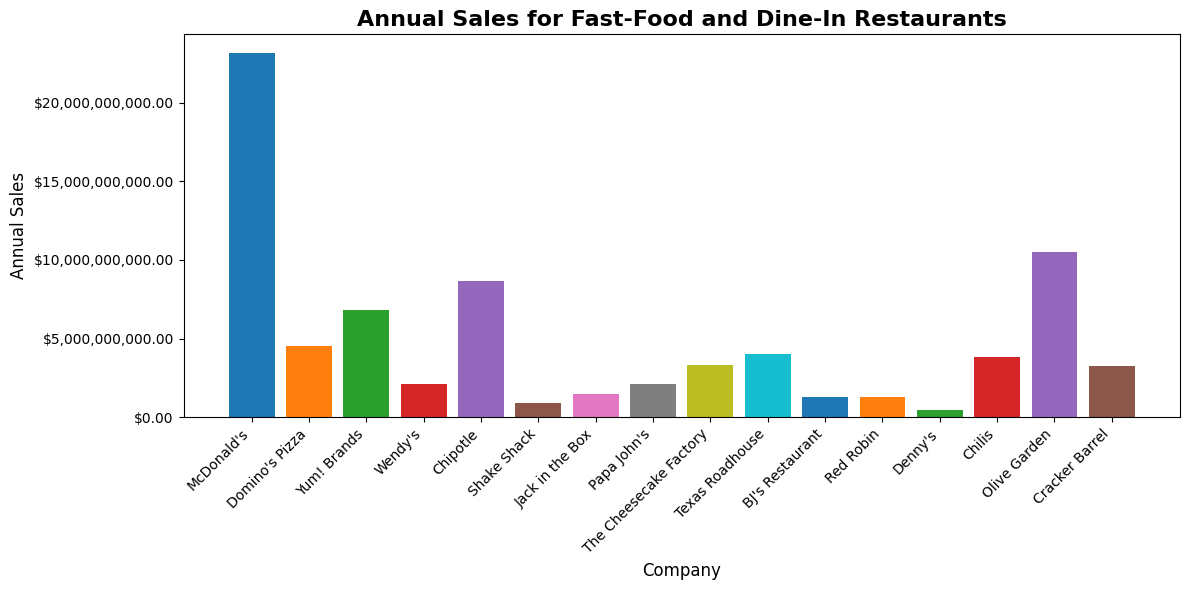

In [52]:
# Merge the two DataFrames
merged_df = pd.concat([fast_food_sales_df, dine_in_sales_df])

# Convert 'Annual Sales' to numeric format
merged_df['Annual Sales'] = merged_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float)

# Create a dictionary of colors for each restaurant
colors = {
    'McDonald\'s': '#1f77b4', 'Domino\'s Pizza': '#ff7f0e', 'Yum! Brands': '#2ca02c', 'Wendy\'s': '#d62728',
    'Chipotle': '#9467bd', 'Shake Shack': '#8c564b', 'Jack in the Box': '#e377c2', 'Papa John\'s': '#7f7f7f',
    'The Cheesecake Factory': '#bcbd22', 'Texas Roadhouse': '#17becf', 'BJ\'s Restaurant': '#1f77b4', 'Red Robin': '#ff7f0e',
    'Denny\'s': '#2ca02c', 'Chilis': '#d62728', 'Olive Garden': '#9467bd', 'Cracker Barrel': '#8c564b'
}

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Company'], merged_df['Annual Sales'], color=merged_df['Company'].map(colors))
plt.xlabel('Company', fontsize=12)
plt.ylabel('Annual Sales', fontsize=12)
plt.title('Annual Sales for Fast-Food and Dine-In Restaurants', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format the y-axis tick labels as dollar values
def dollar_formatter(x, pos):
    return format_as_dollars(x)

y_format = mticker.FuncFormatter(dollar_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

plt.tight_layout()

# Save the chart to a file 
#plt.savefig('annual_sales_bar.png')

plt.show()

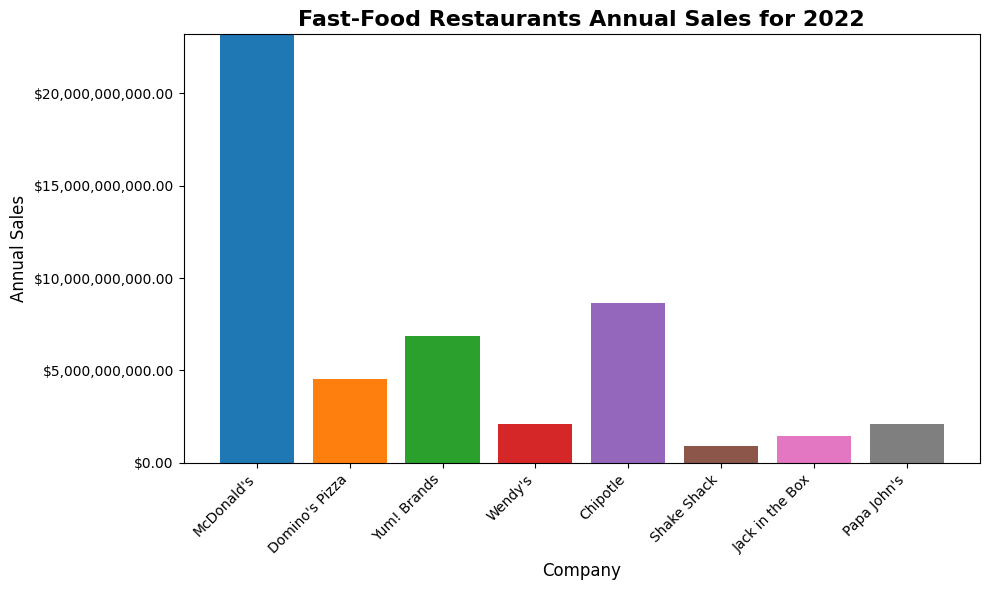

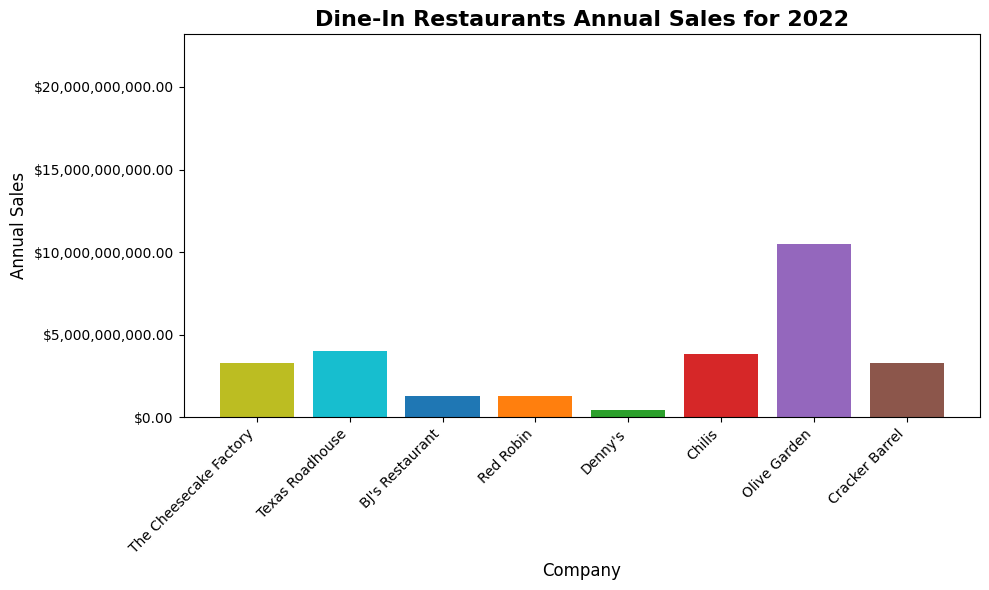

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Calculate the maximum value from both DataFrames
max_value = max(
    fast_food_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float).max(),
    other_restaurant_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float).max()
)

# Create bar chart for fast-food restaurants
plt.figure(figsize=(10, 6))
plt.bar(fast_food_sales_df['Company'], fast_food_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float),
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.xlabel('Company', fontsize=12)
plt.ylabel('Annual Sales', fontsize=12)
plt.title('Fast-Food Restaurants Annual Sales for 2022', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format the y-axis tick labels as dollar values
def dollar_formatter(x, pos):
    return '${:,.2f}'.format(x)

y_format = mticker.FuncFormatter(dollar_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

# Set the y-axis limits to be the same for both graphs
plt.ylim(0, max_value)

plt.tight_layout()

# Save the chart to a file 
plt.savefig('ff_sales_bar.png')

plt.show()

# Create bar chart for other restaurants
plt.figure(figsize=(10, 6))
plt.bar(other_restaurant_sales_df['Company'], other_restaurant_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float),
        color=['#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.xlabel('Company', fontsize=12)
plt.ylabel('Annual Sales', fontsize=12)
plt.title('Dine-In Restaurants Annual Sales for 2022', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format the y-axis tick labels as dollar values
plt.gca().yaxis.set_major_formatter(y_format)

# Set the y-axis limits to be the same for both graphs
plt.ylim(0, max_value)

plt.tight_layout()

# Save the chart to a file 
#plt.savefig('di_sales_bar.png')

plt.show()

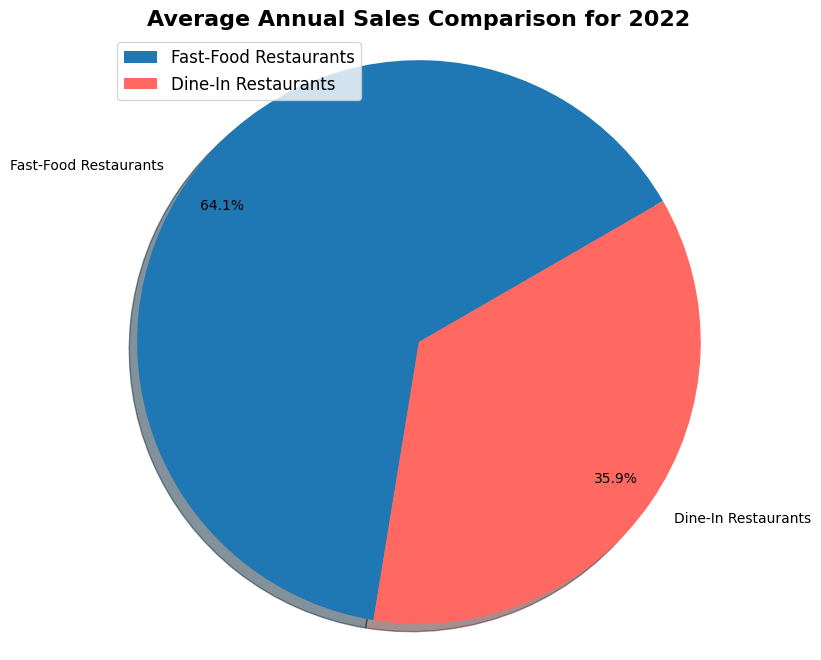

In [43]:

# Calculate the sum of annual sales for each DataFrame
fast_food_total_sales = fast_food_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float).sum()
other_restaurant_total_sales = other_restaurant_sales_df['Annual Sales'].replace('[\$,]', '', regex=True).astype(float).sum()

# Create a pie chart to visualize the two total annual sales
categories = ['Fast-Food Restaurants', 'Dine-In Restaurants']
total_sales = [fast_food_total_sales, other_restaurant_total_sales]

plt.figure(figsize=(8, 8))

# Use a custom colormap for the pie chart
colors = ['#1f77b4', '#ff6961']
plt.pie(total_sales, labels=categories, colors=colors, autopct='%1.1f%%', startangle=30, pctdistance=0.85, shadow=True)

# Add a legend
plt.legend(labels, loc='upper left', fontsize=12)

# Add a title to the pie chart
plt.title('Average Annual Sales Comparison for 2022', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Save the chart to a file 
#plt.savefig('pie_chart_sales.png')

plt.show()

In [4]:
#Using Yelp Fusion API to get ratings data to compare fast food vs dine in restaurants

import requests
import pandas as pd
import time
import os
from config import yelp_key

# Replace 'YOUR_API_KEY' with your actual Yelp API key
API_KEY = yelp_key


def get_restaurant_ratings(restaurant_list, state_list):
    endpoint = "https://api.yelp.com/v3/businesses/search"
    headers = {
        "Authorization": f"Bearer {API_KEY}",
    }
    restaurant_data = {"Restaurant": [], "Mean Rating": []}

    for restaurant in restaurant_list:
        restaurant_ratings = []

        for state in state_list:
            params = {
                "term": restaurant,
                "location": state,
                "limit": 50,  # Adjust the limit based on the number of results you want to retrieve for each state
            }

            response = requests.get(endpoint, headers=headers, params=params)

            if response.status_code == 200:
                data = response.json()

                if "businesses" in data:
                    for business in data["businesses"]:
                        rating = business["rating"]
                        restaurant_ratings.append(rating)

                else:
                    print(f"No data for {restaurant} in {state}")

            elif response.status_code == 429:
                print(f"API rate limit reached. Waiting for 60 seconds...")
                time.sleep(60)
                continue

            else:
                print(f"Error fetching data for {restaurant} in {state}. Status Code: {response.status_code}")

            # Introduce a delay of 2 seconds to avoid API rate limit issues
            time.sleep(2)

        mean_rating = calculate_mean(restaurant_ratings)
        if mean_rating is not None:
            restaurant_data["Restaurant"].append(restaurant)
            restaurant_data["Mean Rating"].append(mean_rating)

    return restaurant_data

def calculate_mean(ratings):
    if not ratings:
        return None
    return sum(ratings) / len(ratings)

if __name__ == "__main__":
    fast_food = [
        "McDonald's", "In-N-Out", "Taco Bell", "Wendy's", "Chipotle",
        "Shake Shack", "Popeyes", "Jack in the Box", "Chick-fil-A", "Papa John's"#,
        #"Domino's", "Panda Express", "Pizza Hut", "Burger King", "KFC", "Dairy Queen", "Subway"
    ]

    restaurants_to_check = [
        "Cheesecake Factory", "Texas Roadhouse", "BJ's Restaurant", "Red Robin", "Denny's",
        "Golden Corral", "Applebees", "Chilis", "Olive Garden", "Cracker Barrel"#,
        #"Outback Steakhouse", "Hard Rock Cafe", "Longhorn Steakhouse",
        #"IHOP", "Yard House", "P.F. Chang's", "Red Lobster"
    ]

    # List of all 50 states in the United States
    state_list = [
        "California", "Texas", "Florida", "New York", "Pennsylvania",
        "Illinois", "Ohio", "Georgia", "North Carolina", "Michigan"
    ]

    # Process fast-food restaurants
    fast_food_data = get_restaurant_ratings(fast_food, state_list)
    fast_food_df = pd.DataFrame(fast_food_data)
    print(fast_food_df)

    # Process other restaurants
    other_restaurants_data = get_restaurant_ratings(restaurants_to_check, state_list)
    other_restaurants_df = pd.DataFrame(other_restaurants_data)
    print(other_restaurants_df)

        Restaurant  Mean Rating
0       McDonald's     1.745119
1         In-N-Out     3.803333
2        Taco Bell     2.290043
3          Wendy's     2.077007
4         Chipotle     2.758889
5      Shake Shack     3.873333
6          Popeyes     2.707778
7  Jack in the Box     2.797778
8      Chick-fil-A     3.199125
9      Papa John's     2.734813
           Restaurant  Mean Rating
0  Cheesecake Factory     3.956763
1     Texas Roadhouse     3.814856
2     BJ's Restaurant     3.662000
3           Red Robin     3.971111
4             Denny's     3.466814
5       Golden Corral     3.267442
6           Applebees     3.174725
7              Chilis     3.305556
8        Olive Garden     3.717920
9      Cracker Barrel     4.051111


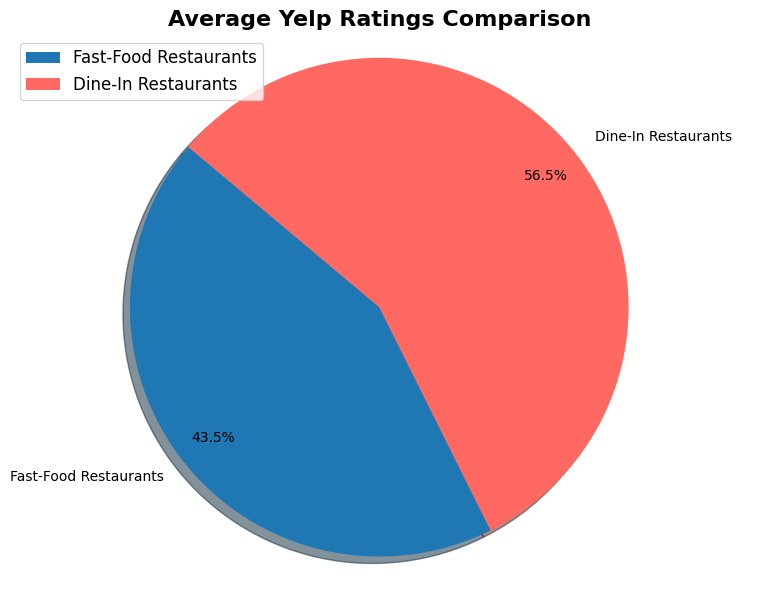

In [14]:
import matplotlib.pyplot as plt

# Calculate the average ratings for each DataFrame
average_ratings_fast_food = fast_food_df["Mean Rating"].mean()
average_ratings_other_restaurants = other_restaurants_df["Mean Rating"].mean()

# Create a list of average ratings and labels for the pie chart
average_ratings = [average_ratings_fast_food, average_ratings_other_restaurants]
labels = ['Fast-Food Restaurants', 'Dine-In Restaurants']
colors = ['#1f77b4', '#ff6961']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(average_ratings, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, shadow=True)
plt.title('Average Yelp Ratings Comparison', fontsize=16, fontweight='bold')

# Add a legend
plt.legend(labels, loc='upper left', fontsize=12)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

# Save the chart to a file 
#plt.savefig('pie_chart.png')
#Show the pie chart
plt.show()



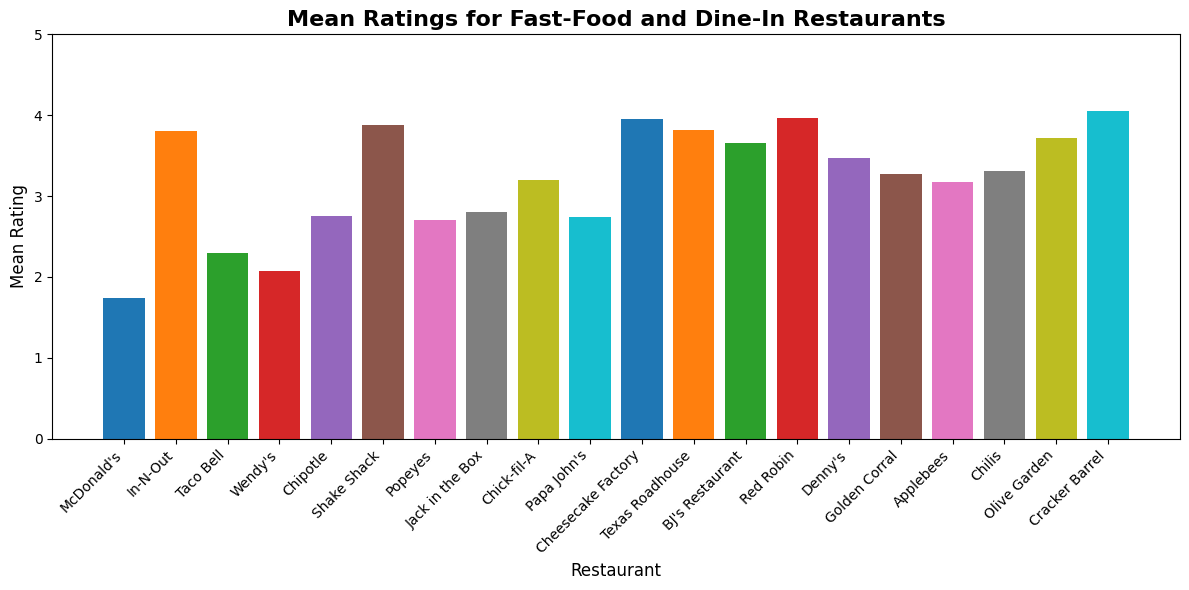

In [47]:
# Merge the two DataFrames
merged_df = pd.concat([fast_food_df, other_restaurants_df])

# Create a dictionary of colors for each restaurant
colors = {
    "McDonald's": "#1f77b4", "In-N-Out": "#ff7f0e", "Taco Bell": "#2ca02c", "Wendy's": "#d62728",
    "Chipotle": "#9467bd", "Shake Shack": "#8c564b", "Popeyes": "#e377c2", "Jack in the Box": "#7f7f7f",
    "Chick-fil-A": "#bcbd22", "Papa John's": "#17becf",
    "Cheesecake Factory": "#1f77b4", "Texas Roadhouse": "#ff7f0e", "BJ's Restaurant": "#2ca02c", "Red Robin": "#d62728",
    "Denny's": "#9467bd", "Golden Corral": "#8c564b", "Applebees": "#e377c2", "Chilis": "#7f7f7f",
    "Olive Garden": "#bcbd22", "Cracker Barrel": "#17becf"
}

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Restaurant'], merged_df['Mean Rating'], color=merged_df['Restaurant'].map(colors))
plt.xlabel('Restaurant', fontsize=12)
plt.ylabel('Mean Rating', fontsize=12)
plt.title('Mean Ratings for Fast-Food and Dine-In Restaurants', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 5)  # Set the same y-axis limit for both DataFrames

plt.tight_layout()

# Save the chart to a file 
#plt.savefig('mean_ratings_bar.png')

plt.show()



In [55]:
# Convert 'Annual Sales' columns to numeric values for fast_food_sales_df and dine_in_sales_df
fast_food_sales_df['Annual Sales'] = fast_food_sales_df['Annual Sales'].str.replace('[\$,]', '', regex=True).astype(float)
dine_in_sales_df['Annual Sales'] = dine_in_sales_df['Annual Sales'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate the correlation coefficients
correlation_fast_food = fast_food_df['Mean Rating'].corr(fast_food_sales_df['Annual Sales'])
correlation_dine_in = other_restaurants_df['Mean Rating'].corr(dine_in_sales_df['Annual Sales'])

print("Correlation Coefficient between Fast-Food Ratings and Sales:", correlation_fast_food)
print("Correlation Coefficient between Dine-In Ratings and Sales:", correlation_dine_in)

Correlation Coefficient between Fast-Food Ratings and Sales: -0.5667228788176925
Correlation Coefficient between Dine-In Ratings and Sales: -0.5071832486600091


In [ ]:
#The average correlation coefficient is approximately -0.5369530637388508.